Задачи:

1)Собрать данные о продажах квартир в Перми (район, цена,
этаж, площадь, кол-во комнат) с сайта avito.

2)Найти топ-5 самых дорогих, дешевых квартир.

3)Разделить квартиры на группы по районам, кол-во комнату,
этажам. Рассчитать кол-во квартир и среднюю цену в
каждой группе. Оценить, где самые дорогие/дешевые
квартиры.

4)Построить гистограмму, ящик с усами для различных групп.
Оценить самую популярную площадь, район, кол-во
комнат.

In [ ]:
!pip install selenium

In [142]:
from bs4 import BeautifulSoup
from selenium.webdriver import Chrome
import pandas as pd
import time

browser = Chrome('chromedriver.exe')

In [132]:
apart = pd.DataFrame(columns=['room','price','district', 'floor', 'square'])

In [133]:
#парсинг данных по квартирам г.Перми с сайта Авито

selector = '.iva-item-body-NPl6W'
for x in range(1,51):
    print('page ', x)
    time.sleep(1)
    browser.get('https://www.avito.ru/perm/kvartiry/prodam-ASgBAgICAUSSA8YQ?cd=1&p='+str(x))
    page = BeautifulSoup(browser.page_source, 'html.parser')
    #print(page.select(selector))
    for item in page.select(selector):
        room, square, floor = str.split(item.select('.title-root-395AQ')[0].text.strip(), ', ')
        
        price = item.select('.price-text-1HrJ_')[0].text.strip()
        #print(price)
        if item.select('.geo-georeferences-3or5Q'):
            district = item.select('.geo-georeferences-3or5Q')[0].text.strip()
        else:
            district = None
        #print(district)
        
        item = {'room':room, 'floor':floor, 'square':square, 'price':price, 'district':district}
        apart.loc[len(apart)] = item

page  1
page  2
page  3
page  4
page  5
page  6
page  7
page  8
page  9
page  10
page  11
page  12
page  13
page  14
page  15
page  16
page  17
page  18
page  19
page  20
page  21
page  22
page  23
page  24
page  25
page  26
page  27
page  28
page  29
page  30
page  31
page  32
page  33
page  34
page  35
page  36
page  37
page  38
page  39
page  40
page  41
page  42
page  43
page  44
page  45
page  46
page  47
page  48
page  49
page  50


In [134]:
apart

,room,price,district,floor,square
0,Своб. планировка,8 554 000 ₽,р-н Ленинский,13/25 эт.,132 м²
1,2-к квартира,3 900 000 ₽,р-н Индустриальный,13/16 эт.,54.7 м²
2,Квартира-студия,2 310 830 ₽,р-н Мотовилихинский,1/4 эт.,34.5 м²
3,1-к квартира,3 120 390 ₽,р-н Мотовилихинский,4/17 эт.,37.8 м²
4,Квартира-студия,1 500 000 ₽,р-н Свердловский,3/5 эт.,17 м²
...,...,...,...,...,...
2798,1-к квартира,3 399 000 ₽,р-н Мотовилихинский,14/25 эт.,40 м²
2799,2-к квартира,6 120 000 ₽,р-н Ленинский,9/17 эт.,72 м²
2800,2-к квартира,3 900 000 ₽,р-н Кировский,8/10 эт.,50 м²
2801,2-к квартира,4 980 000 ₽,р-н Дзержинский,18/18 эт.,71 м²


In [135]:
apart['price'] = apart.price.str.replace(' ', '')
apart['price'] = apart.price.str.replace('([^0-9]+)', '')
apart['price'] = apart['price'].astype(float)
apart.head()

,room,price,district,floor,square
0,Своб. планировка,8554000.0,р-н Ленинский,13/25 эт.,132 м²
1,2-к квартира,3900000.0,р-н Индустриальный,13/16 эт.,54.7 м²
2,Квартира-студия,2310830.0,р-н Мотовилихинский,1/4 эт.,34.5 м²
3,1-к квартира,3120390.0,р-н Мотовилихинский,4/17 эт.,37.8 м²
4,Квартира-студия,1500000.0,р-н Свердловский,3/5 эт.,17 м²


In [154]:
apart['square'] = apart.square.str.replace(' м²', '')
apart['square'] = apart.square.str.replace(' ', '')
apart['square'] = apart['square'].astype(float)

apart.head()

AttributeError: Can only use .str accessor with string values!

In [137]:
apart = apart.drop(index=apart[apart['district'].isnull()].index)

In [139]:
apart.shape

(2770, 5)

In [141]:
apart.to_csv('avito.csv', index=False)

In [155]:
apart = pd.read_csv('avito.csv')

In [156]:
apart

,room,price,district,floor,square
0,Своб. планировка,8554000.0,р-н Ленинский,13/25 эт.,132.0
1,2-к квартира,3900000.0,р-н Индустриальный,13/16 эт.,54.7
2,Квартира-студия,2310830.0,р-н Мотовилихинский,1/4 эт.,34.5
3,1-к квартира,3120390.0,р-н Мотовилихинский,4/17 эт.,37.8
4,Квартира-студия,1500000.0,р-н Свердловский,3/5 эт.,17.0
...,...,...,...,...,...
2765,1-к квартира,3399000.0,р-н Мотовилихинский,14/25 эт.,40.0
2766,2-к квартира,6120000.0,р-н Ленинский,9/17 эт.,72.0
2767,2-к квартира,3900000.0,р-н Кировский,8/10 эт.,50.0
2768,2-к квартира,4980000.0,р-н Дзержинский,18/18 эт.,71.0


In [157]:
apart['floor'] = apart['floor'].str.replace(' эт.', '')
floor = apart['floor'].str.split('/', expand=True)
apart['floor'] = floor.loc[:,0].astype(int)
apart['number of storeys'] = floor.loc[:,1].astype(int)
apart

,room,price,district,floor,square,number of storeys
0,Своб. планировка,8554000.0,р-н Ленинский,13,132.0,25
1,2-к квартира,3900000.0,р-н Индустриальный,13,54.7,16
2,Квартира-студия,2310830.0,р-н Мотовилихинский,1,34.5,4
3,1-к квартира,3120390.0,р-н Мотовилихинский,4,37.8,17
4,Квартира-студия,1500000.0,р-н Свердловский,3,17.0,5
...,...,...,...,...,...,...
2765,1-к квартира,3399000.0,р-н Мотовилихинский,14,40.0,25
2766,2-к квартира,6120000.0,р-н Ленинский,9,72.0,17
2767,2-к квартира,3900000.0,р-н Кировский,8,50.0,10
2768,2-к квартира,4980000.0,р-н Дзержинский,18,71.0,18


In [158]:
# топ-5 самых дешевых квартир

apart.sort_values(by='price').head(5)

,room,price,district,floor,square,number of storeys
648,1-к квартира,400000.0,р-н Мотовилихинский,1,40.0,2
195,1-к квартира,555000.0,р-н Свердловский,1,17.0,5
2518,Студия,590000.0,р-н Свердловский,1,18.0,5
93,1-к квартира,670000.0,р-н Кировский,2,14.0,5
1058,1-к квартира,680000.0,р-н Орджоникидзевский,4,17.8,5


In [159]:
# топ-5 самых дорогих квартир

apart.sort_values(by='price', ascending=False).head(5)

,room,price,district,floor,square,number of storeys
2064,6-к квартира,73000000.0,р-н Ленинский,18,280.0,18
2477,4-к квартира,24000000.0,р-н Свердловский,7,220.0,11
1931,6-к квартира,23000000.0,р-н Свердловский,15,279.1,16
104,5-к квартира,22000000.0,р-н Свердловский,6,200.0,6
481,4-к квартира,19500000.0,р-н Свердловский,2,192.0,8


In [166]:
#Разделить квартиры на группы по районам. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('district') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
district,,
р-н Ленинский,173,6334847.0
Пермь,3,5106701.0
р-н Свердловский,671,3964375.0
р-н Дзержинский,472,3800839.0
р-н Индустриальный,402,3452171.0
р-н Мотовилихинский,505,3207964.0
р-н Кировский,272,2441593.0
р-н Орджоникидзевский,272,2220120.0


In [167]:
# Разделить квартиры на группы по кол-ву комнат. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('room') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
room,,
6-к квартира,6,23616667.0
5-к квартира,11,9545006.0
4-к апартаменты,2,9440000.0
3-к апартаменты,9,7990000.0
Своб. планировка,15,7390733.0
4-к квартира,127,6693080.0
3-к квартира,698,4491025.0
2-к квартира,1003,3291846.0
9-к квартира,1,3235410.0


In [171]:
# Разделить квартиры на группы по этажам. 
# Рассчитать кол-во квартир и среднюю цену в каждой группе. 
# Оценить, где самые дорогие/дешевые квартиры.

apart.groupby('floor') \
    .agg({'room': 'count', 'price':'mean'}) \
    .sort_values(by='price', ascending=False) \
    .rename(columns={'room':'count', 'price':'mean_price'}).round(0)

,count,mean_price
floor,,
18,17,8831765.0
19,23,6574377.0
20,16,5781549.0
22,5,5763704.0
25,10,5758251.0
17,15,5518420.0
13,50,5123444.0
11,53,4776172.0
23,4,4674880.0


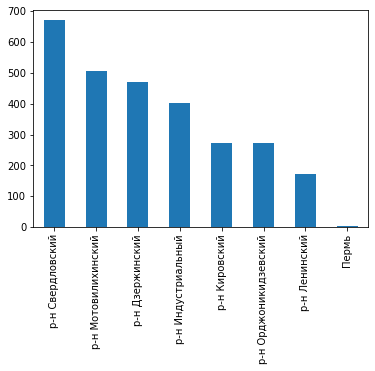

In [172]:
# Построить гистограмму по районам

apart['district'].value_counts().plot(kind='bar')

In [191]:
# самая популярный район
apart['district'].mode()

0    р-н Свердловский
dtype: object

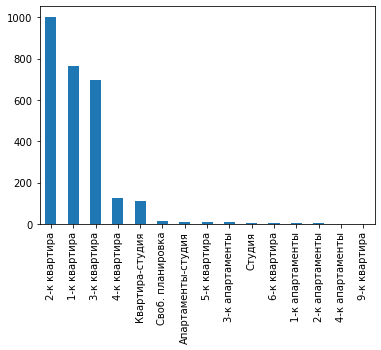

In [197]:
apart['room'].value_counts().plot(kind='bar')

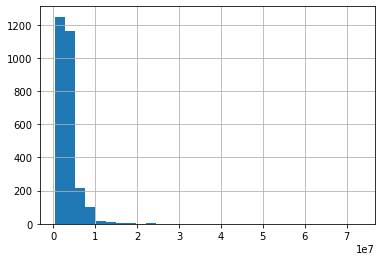

In [176]:
apart['price'].hist(bins=30)

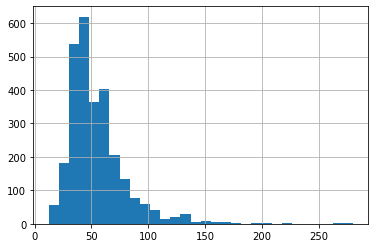

In [196]:
apart['square'].hist(bins=30)

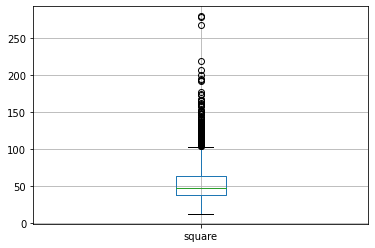

In [193]:
# ящик с усами по площади
apart.boxplot('square')

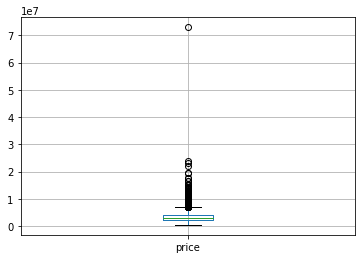

In [194]:
# ящик с усами по цене
apart.boxplot('price')


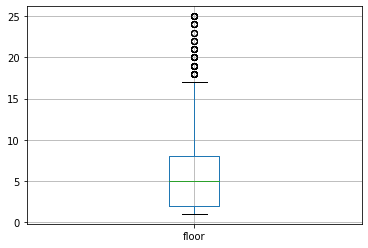

In [195]:
# ящик с усами по этажам
apart.boxplot('floor')


Populating the interactive namespace from numpy and matplotlib


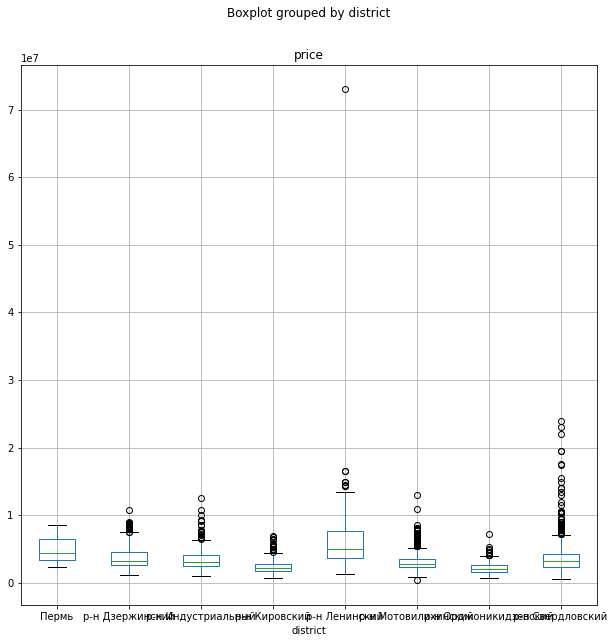

In [199]:
%pylab inline
import matplotlib.pyplot as plt

apart.boxplot(column='price',  by='district', figsize=(10,10))
plt.show()

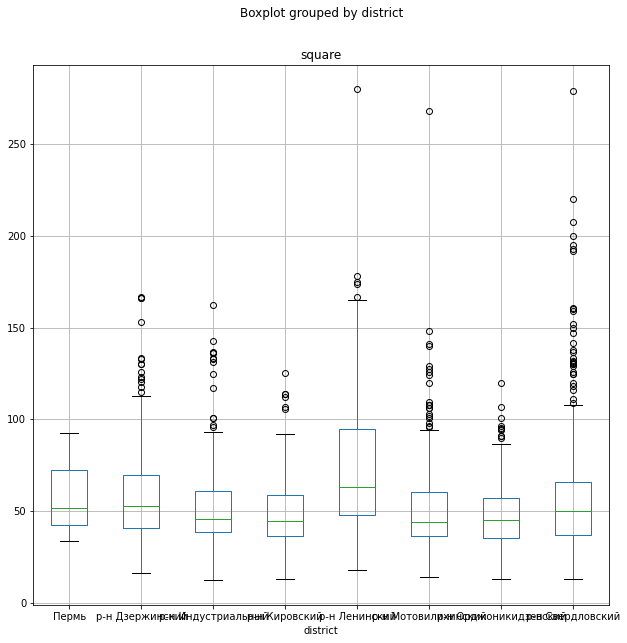

In [200]:
apart.boxplot(column='square',  by='district', figsize=(10,10))
plt.show()